In [328]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from scipy.sparse import coo_matrix, hstack
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout

import warnings
warnings.filterwarnings('ignore')

In [95]:
train = pd.read_csv('/Users/atru/Desktop/kaggle/dataset/Phase 2 - stockDirection/train.csv')
test = pd.read_csv('/Users/atru/Desktop/kaggle/dataset/Phase 2 - stockDirection/test.csv')

In [371]:
test

,Date,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2/19/10,b'What a surprise...',"b'""The whole idea of communism is dead in Nort...","b""Selectively applying and breaking the law in...","b""BBC News - Dutch government 'collapses' in r...",b'Japan gets the nod to kill whales again',"b""Britain 'knew Mossad was using fake passport...",b'Lost Nazi nuke-project uranium found in Dutc...,"b""Assisted suicide: law to be decriminalised '...",b'BBC News - Incredible Footage of Madeira Flo...,...,b'Scary Shit from Hungary',b'Britain denies any advance warning of plan t...,b'When China Rules the World',"b""Michel Chossudovsky, who's from an independe...",b'Dutch government collapses Amid disagreement...,"b""Iran's science progress fastest in world: Ca...",b'Bishop Walter Mixa faces continuing criticis...,b'St. Trinians and beyond -- Ronald Searle at 90',b'Britain at risk of worse deficit crisis than...,"b""Zahra's Paradise. A 7-languages webcomic on ..."
1,12/17/10,Richard Stallman: The actions against MasterCa...,The French Government Can Now Censor the Inter...,Julian Assange interview with BBC hours after ...,"""Now WikiLeaks has laid bare the lies and coll...",Google's Satellite Images Reveal Chinese 'Ghos...,WikiLeaks breaks no Australian laws: Australia...,The Lebanese army has dismantled two Israeli s...,"Mexicos Drug War Leaves 30,196 Dead in Four Years",WikiLeaks: Cables reveal U.S.-Cuban cooperatio...,...,A new Cold War is starting in Asia as Japan is...,Austrian man convicted for yodelling while Mus...,WikiLeaks army comes out to defend freedom of ...,Women with seditious eyes must cover up,Scores die as drones renew attack on Pakistan'...,CIA top spy flees Pakistan over lawsuit - The ...,Eamonn McCann: Why the US is up in arms over W...,South African politicians beaten by Israeli so...,Japan is changing its defence policy in respon...,More warnings from North Korea for retaliation...
2,10/26/15,College applications in UK to become anonymous...,Saudi Arabia to run out of cash in fewer than ...,Saudi Prince Arrested in Beirut on Drug Smuggling,Strong earthquake jolts Islamabad,UK accused of doing China's bidding after poli...,WHO: Processed meats cause cancer.,Dutch court revokes Scientology's tax-exempt s...,A Chinese biotechnological company announced t...,Activists urge Trudeau to defend Canadas copyr...,...,Scientifically validated anti-diabetes herbal ...,Muslim leader condemns beheading of South Suda...,Red meat cancer risk to be revealed by WHO,Pakistan uses Taliban to counter India: CIA ch...,Tour boat carrying 27 passengers sinks off Tof...,China to supply fuel to Nepal after protesters...,Europe is starting to shut down the free flow ...,Nine killed in gun battle between Turkish poli...,"Guatemala's jailed former president, Otto Pere...",Plane's Undercarriage Collapses During Landing
3,4/3/13,North Korea via Instagram,"""North Koreans are not getting any information...","Saudi Arabia will now let women ride bicycles,...",Brazilian men gangrape an American girl in a p...,Russian billionaire plans to make humans immor...,Indian woman burns her rapist to death,"""Gate to hell"" discovered by Italian scientists.",Sony makes more money selling life insurance t...,"China deploys tanks, armor to NK border",...,City plans to fight drug addiction with... mar...,New face-sized tarantula discovered in Sri Lan...,Bangladesh police have arrested three atheist ...,Germany Doesn't Get Much Sun. How Did It Becom...,Saudi court sentences man to be paralyzed,"""The Anonymous hacktivist collective announced...",Double standard emerges in Brazil van gang rap...,Slain dictator Gaddafis only daughter booted f...,Cyprus President's Family Transferred Tens Of ...,Australia launches national child sex abuse in...
4,4/21/10,"b'Explicit mention of religion is seen as ""un-...","b'Yesterday, Israel delivered demolition warra...","b""Argentina's former military President has be...

Data Cleaning

In [97]:
train['Direction'] = ''

for i in range(0, len(train)):
    if train['Adj Close'][i] > train['Open'][i]:
        train['Direction'][i] = int(1)
    else:
        train['Direction'][i] = int(0)
        

In [98]:
y = train['Direction']

In [90]:
len(y)

1591

In [91]:
type(y)

pandas.core.series.Series

In [92]:
for i in range(8, len(train.columns)-1):

    train[train.columns[i]] = train[train.columns[i]].str.replace('[^\w\s]','')
    train[train.columns[i]] = train[train.columns[i]].str.lower()



In [100]:
train

,Date,Open,High,Low,Close,Volume,Adj Close,Top1,Top2,Top3,...,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,Direction
0,8/26/15,15676.259770,16303.750000,15676.259770,16285.509770,208420000,16285.509770,Switzerland has completed the construction of ...,Ancient Greek palace unearthed near Sparta dat...,Nearly a billion monarch butterflies have vani...,...,Canada has engineered bacteria that send a rem...,Migrants crisis: Germany's Merkel booed at Hei...,Thailand destroys ivory stockpile in ceremony ...,A pioneering procedure has led to a baby being...,Trans-Pacific Trade Agreement: Potential damag...,Germany has reportedly begun taking steps towa...,Senior Iran aide: Israel should be annihilated...,Italy hits back at Merkel in migrants row - It...,Court orders Russia to pay compensation for Gr...,1
1,1/12/12,12449.910160,12483.700200,12385.080080,12471.019530,128230000,12471.019530,Loggers in Brazil captured an eight-year-old g...,300 Chinese Foxconn Workers 'Threaten Mass Sui...,Tens of Thousands living in 6x2ft rabbit cages...,...,Canadian military containers from Afghanistan ...,Brazil says no evidence loggers burned indigen...,Afghanistans President Karzai condemns video s...,Iran's currency in freefall --- Iran's currenc...,Iran Says Scientists Murder Reveals Global Ter...,UK's Duchess of York charged in Turkey with il...,Opium price rises by 133% in Afghanistan,Holland bans khat leaves: Chewing of khat can ...,Why Are England and Scotland Splitting? - \nTo...,1
2,11/2/12,13232.620120,13289.450200,13076.570310,13093.160160,137660000,13093.160160,The home front: Man builds 60ft-long World War...,Pakistani couple kill daughter for talking to ...,"Thousands of Iranians chanting ""Death to Ameri...",...,"Sean Quinn, once Ireland's richest man, is giv...",Greek court dismisses charges against 'Lagarde...,"Greek journalist who published names of 2,000...","In Brazil, researchers genetically modifying m...",Iskandar Malaysia: the green mega-city rising ...,Japan protests after new report of incident in...,U.S. quietly eases rules on sale of medicines ...,"Hit by crisis, Greek society in free-fall",Is this the darkest day for Russia under Putin...,0
3,8/8/08,11432.089840,11759.959960,11388.040040,11734.320310,212830000,11734.320310,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",1
4,12/31/14,17987.660160,18043.220700,17820.880860,17823.070310,82840000,17823.070310,AirAsia flight found at the bottom of the Java...,North Korean defector details 'human experimen...,Korean Air ex-executive Cho Hyun-ah arrested -...,...,Britain says it cannot support new Palestinian...,Bolivias Morales: US 'Backs Drug Trafficking',Euro zone politicians are not obliged to rescu...,Greece Dissolves Parliament to Prepare for Ear...,German Chancellor Angela Merkel in a New Year'...,Al Shabaab leader killed in U.S. air strike in...,New solar power material converts 90 percent o...,China launches website laying claim to Senkaku...,At Least 33 Killed in Yemen Suicide Bombing,0
5,8/29/11,11286.650390,11541.780270,11286.580080,11539.250000,177540000,11539.250000,"Luxury, horror lurk in Gadhafi family compound",Disney's best-selling Cars toys are being made...,Chinese artist Ai Weiwei remained largely sile...,...,"Gaddafi's girl executioner: Nisreen, 19, admit...",Nigeria: Too Big to Fail -- From corruption to...,Bird flu fear as strain mutates,Syria forces surround town after 'defections':...,Labour seeks law change to stop News 

In [196]:
topheadline = train.iloc[:, 7: len(train.columns)]

In [197]:
top_melt = pd.melt(topheadline, id_vars=['Direction'])

In [198]:
y = top_melt['Direction']

In [396]:
top_melt

,Direction,variable,value
0,1,Top1,Switzerland has completed the construction of ...
1,1,Top1,Loggers in Brazil captured an eight-year-old g...
2,0,Top1,The home front: Man builds 60ft-long World War...
3,1,Top1,
4,0,Top1,AirAsia flight found at the bottom of the Java...
5,1,Top1,"Luxury, horror lurk in Gadhafi family compound"
6,1,Top1,
7,0,Top1,"A German man who alleges he was subjected to ""..."
8,1,Top1,
9,1,Top1,


In [199]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(stop_words="english")
X_train = vect.fit_transform(topheadline['Top1'])
X_train.shape

feature_names = np.array(vect.get_feature_names())

from sklearn.decomposition import TruncatedSVD
lsa = TruncatedSVD(n_components=100)
X_lsa = lsa.fit_transform(X_train)
lsa.components_.shape

from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
X_scaled = scaler.fit_transform(X_train)
lsa_scaled = TruncatedSVD(n_components=100)
X_lsa_scaled = lsa_scaled.fit_transform(X_scaled)

In [398]:
US_words = ['usa', 'u.s', 'u.s.', 'nato', 'north america', 'america', 'stock market', 'bonds market', 'interest rate', 'government', \
           'funds', 'election', 'presidency', 'presidential', 'europe', 'africa', 'asia', 'dow jones', 'currency', 'oil', 'gas', \
            'chevron', 'exxonmobile', '3M',
'American Express',
'Apple',
'Boeing',
'Caterpillar',
'Chevron',
'Cisco Systems',
'Coca-Cola',
'DowDuPont',
'ExxonMobil',
'Goldman Sachs',
'The Home Depot',
'IBM',
'Intel',
'Johnson & Johnson',
'JPMorgan Chase',
'McDonalds',
'Merck & Company',
'Microsoft',
'Nike',
'Pfizer',
'Procter & Gamble',
'Travelers',
'UnitedHealth Group',
'United Technologies',
'Verizon',
'Visa',
'Walmart',
'Walgreens Boots Alliance',
'Walt Disney','NYSE', 'nasdaq', 'MMM',
'AXP',
'AAPL',
'BA',
'CAT',
'CVX',
'CSCO',
'KO',
'DWDP',
'XOM',
'GS',
'HD',
'IBM',
'INTC',
'JNJ',
'JPM',
'MCD',
'MRK',
'MSFT',
'NKE',
'PFE',
'PG',
'TRV',
'UNH',
'UTX',
'VZ',
'V',
'WMT',
'WBA',
'DIS', 'stock', 'dow jones']




In [128]:
# remove ones with /r
# try keeping ones with 'b'


In [399]:
top_melt_copy = top_melt_copy.dropna()

In [400]:
import re
top_melt_copy = top_melt
for i in range(0, len(top_melt_copy)):
    print('')
    if any(word in top_melt_copy['value'][i] for word in US_words): #re.compile('|'.join(bad_words),re.IGNORECASE).search(top_melt_copy['value'][i]): 
        pass
    else:
        top_melt_copy['value'][i] = ''


TypeError: argument of type 'float' is not iterable

In [443]:
bad_words = ['sex', 'rape', 'maturbation', 'masturbate','drug', 'church', 'random', 'funny', 'cutest', 'cute','gay', 'lgbt', 'scientology', 'religion', 'jewish', 'nazi', 'islam' \
            'priest', 'christian', 'anti-semitism', 'jew', 'buddha', 'wtf', 'awww', 'porn', 'league of legend', 'zelda', 'game of thrones', 'mdma', 'flee', 'fled', 'north korea' ]




In [373]:
 top_melt_copy['value'][5009]

''

In [444]:
import re
top_melt_copy = top_melt
for i in range(0, len(top_melt_copy)):
    print('')
    if '/r/' in top_melt_copy['value'][i]:
        top_melt_copy['value'][i] = ''
    if '!' in top_melt_copy['value'][i]:
        top_melt_copy['value'][i] = ''
    if any(word in top_melt_copy['value'][i] for word in bad_words): #re.compile('|'.join(bad_words),re.IGNORECASE).search(top_melt_copy['value'][i]): 
        top_melt_copy['value'][i] = ''


TypeError: argument of type 'float' is not iterable

In [451]:
#top_melt_copy = top_melt_copy.drop_duplicates()
ngram = (5,5)


vector1 = TfidfVectorizer(encoding='utf-8', ngram_range= ngram, max_df = 0.5, stop_words = 'english')
train1 = vector1.fit_transform(top_melt_copy['value'].values.astype('U'))
#X_concat = hstack([train1])
X_train_all = train1.tocsr()

In [452]:
features = vector1.get_feature_names()

In [453]:
def top_feats_in_doc(Xtr, features, row_id, top_n=50):
#''' Top tfidf features in specific document (matrix row) '''
    row = np.squeeze(Xtr[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)

In [454]:
top_feats_in_doc(train1, features, 28, top_n = 55)

,feature,tfidf
0,zyklon deadly poison gas used,0.0
1,football fan leader alexander shprygin,0.0
2,force 000 troops capacity travel,0.0
3,forbidden making fun candidates ahead,0.0
4,forbes powerful people list spot,0.0
5,footprint lowered electricity costs government,0.0
6,footless torture victim unearthed near,0.0
7,footballer named philosopher trained doctor,0.0
8,football stadium foiled game cancelled,0.0
9,football song written 1924 germany,0.0


In [447]:
X_train, X_test, y_train, y_test = train_test_split(X_train_all, y, random_state=0)

In [448]:
y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [449]:
lr = LogisticRegressionCV().fit(X_train, y_train)
score = cross_val_score(lr, X_train, y_train, cv= 2, scoring = 'accuracy')

In [450]:
print('Average accuracy:')
print(np.mean(score))
print('Best parameter:\n{}'.format(lr.C_))

Average accuracy:
0.5356843940099646
Best parameter:
[0.35938137]


In [397]:
top_melt_copy['value'].values.astype('U')

array(['Switzerland has completed the construction of the 57 km long Gotthard Base Tunnel, connecting Milan to Zurich',
       "Loggers in Brazil captured an eight-year-old girl from one of the Amazon's last uncontacted tribes and burned her alive as part of a campaign to force the indigenous population from its land.",
       'The home front: Man builds 60ft-long World War I trench in his back garden - and then invites history buffs round for re-enactment',
       ...,
       'Major setback for agrobusiness: European Court of Justice stops honey that contains traces of pollen from genetically modified crops ',
       "b'The heirs to Argentinas most powerful media empire have been ordered to take DNA tests that could establish whether they were part of a forced adoption scheme during the countrys darkest era. '",
       'China: Report exposes Foxconns oppressive work regime. "A report on conditions inside the Chinese factories of giant electronics manufacturer Foxconn has provided grap

In [370]:
param_grid = {'tfidfvectorizer__max_df': [0.4, 0.5, 0.6, 0.7],
              'logisticregression__C': [100, 10, 1, 0.1, 0.01, 0.001],
              "tfidfvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3),(1,4), (2, 3), (2, 5), (3, 8), (5, 5)]} 

pipe = make_pipeline(TfidfVectorizer(encoding='utf-8'), LogisticRegression())

grid = GridSearchCV(pipe, param_grid = param_grid, cv = 3, scoring = 'accuracy')
#y_train=y_train.astype('int')
grid.fit(top_melt_copy['value'].values.astype('U'), y.astype('int'))

print("best mean cross-validation score: {:.5f}".format(grid.best_score_))
print("best parameter: {}".format(grid.best_params_))

best mean cross-validation score: 0.53908
best parameter: {'logisticregression__C': 100, 'tfidfvectorizer__max_df': 0.4, 'tfidfvectorizer__ngram_range': (5, 5)}


In [317]:
X_train.shape

(29831, 881446)

In [318]:
y_test.shape

(9944,)

In [122]:
model_dropout = Sequential([
    Dense(1024, input_shape=(292678,), activation='relu'),
    Dropout(.5),
    Dense(1024, activation='relu'),
    Dropout(.5),
    Dense(1, activation='sigmoid'),
])

In [123]:
model_dropout.compile("adam", "binary_crossentropy", metrics=['accuracy'])
history_dropout = model_dropout.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_split=.1)

Train on 26847 samples, validate on 2984 samples
Epoch 1/20
10112/26847 [==========>...................] - ETA: 11:57 - loss: 0.6909 - acc: 0.5343

KeyboardInterrupt: 

In [ ]:
score = model_dropout.evaluate(X_test, y_test, verbose=0)
print("Test loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))

In [275]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train, y_train)  
clf.score(X_test, y_test)

0.5201005025125628

In [71]:
from sklearn.decomposition import NMF

model = NMF(n_components = 100, init='random', random_state=0)
W = model.fit_transform(X_train)
#H = model.components_

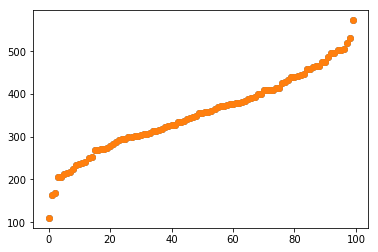

In [73]:
plt.plot(np.sort(model.components_.sum(axis=1)), "o")
plt.show()